## 1.1 강서구 인구밀도

In [40]:
import warnings

warnings.filterwarnings("ignore")

In [41]:
# import libaray and packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# prepare and read data
F1 = './POP/nlsp_030001001.shp' 
D1 = gpd.read_file(F1, encoding='utf-8')
D1.head()

,gid,lbl,val,geometry
0,다사44b50b,7274.00,7274.0,"POLYGON ((944500.000 1950500.000, 944500.000 1..."
1,다사43a51a,8520.00,8520.0,"POLYGON ((943000.000 1951000.000, 943000.000 1..."
2,다사41a51a,1328.00,1328.0,"POLYGON ((941000.000 1951000.000, 941000.000 1..."
3,다사43a50a,2700.00,2700.0,"POLYGON ((943000.000 1950000.000, 943000.000 1..."
4,다사39b51b,8887.00,8887.0,"POLYGON ((939500.000 1951500.000, 939500.000 1..."


<AxesSubplot:>

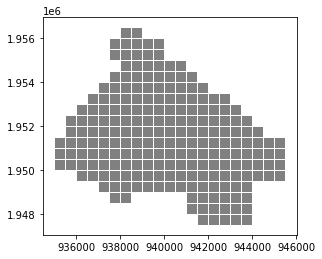

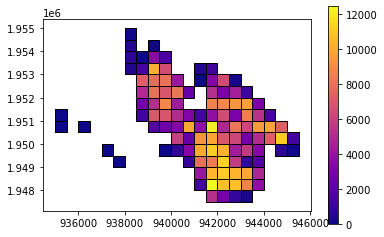

In [42]:
D1.convex_hull.plot(color='gray', edgecolor="w")
D1.plot(column='val', cmap='plasma', edgecolor='black', legend=True)

## 1.2 좌표계 변환

In [43]:
import pyproj
from fiona.crs import from_epsg

seoul = D1.to_crs(epsg=4326)
seoul

,gid,lbl,val,geometry
0,다사44b50b,7274.00,7274.0,"POLYGON ((126.87167 37.55217, 126.87163 37.556..."
1,다사43a51a,8520.00,8520.0,"POLYGON ((126.85465 37.55659, 126.85461 37.561..."
2,다사41a51a,1328.00,1328.0,"POLYGON ((126.83200 37.55646, 126.83196 37.560..."
3,다사43a50a,2700.00,2700.0,"POLYGON ((126.85473 37.54757, 126.85469 37.552..."
4,다사39b51b,8887.00,8887.0,"POLYGON ((126.81498 37.56087, 126.81494 37.565..."
...,...,...,...,...
209,다사38a50b,NaN,NaN,"POLYGON ((126.79808 37.55176, 126.79804 37.556..."
210,다사36b51b,NaN,NaN,"POLYGON ((126.78102 37.56067, 126.78097 37.565..."
211,다사43b52a,NaN,NaN,"POLYGON ((126.86023 37.56563, 126.86019 37.570..."
212,다사41a54a,NaN,NaN,"POLYGON ((126.83176 37.58350, 126.83172 37.588..."


## 1.3 수요지 노드

In [56]:
seoul2 = seoul.dropna(subset=['val'])
seoul2

,gid,lbl,val,geometry,centroid
0,다사44b50b,7274.00,7274.0,"POLYGON ((126.87167 37.55217, 126.87163 37.556...",POINT (126.87448 37.55444)
1,다사43a51a,8520.00,8520.0,"POLYGON ((126.85465 37.55659, 126.85461 37.561...",POINT (126.85746 37.55886)
2,다사41a51a,1328.00,1328.0,"POLYGON ((126.83200 37.55646, 126.83196 37.560...",POINT (126.83482 37.55873)
3,다사43a50a,2700.00,2700.0,"POLYGON ((126.85473 37.54757, 126.85469 37.552...",POINT (126.85754 37.54984)
4,다사39b51b,8887.00,8887.0,"POLYGON ((126.81498 37.56087, 126.81494 37.565...",POINT (126.81779 37.56314)
...,...,...,...,...,...
108,다사40b52a,2305.00,2305.0,"POLYGON ((126.82626 37.56544, 126.82622 37.569...",POINT (126.82907 37.56771)
109,다사39a52b,7878.00,7878.0,"POLYGON ((126.80924 37.56985, 126.80920 37.574...",POINT (126.81205 37.57212)
110,다사38b53a,1267.00,1267.0,"POLYGON ((126.80353 37.57432, 126.80349 37.578...",POINT (126.80634 37.57659)
111,다사39b53b,1588.00,1588.0,"POLYGON ((126.81482 37.57890, 126.81478 37.583...",POINT (126.81763 37.58117)


In [63]:

# Calculate centroids of grid polygons
seoul2['centroid'] = seoul2.centroid


# Extract centroid coordinates as a DataFrame
centroid_df = pd.DataFrame({'위도': seoul2['centroid'].y, '경도': seoul2['centroid'].x})

centroid_df

# Save the DataFrame to Excel
centroid_df.to_excel('demand_points.xlsx', index=False)


## 1.3 시각화 

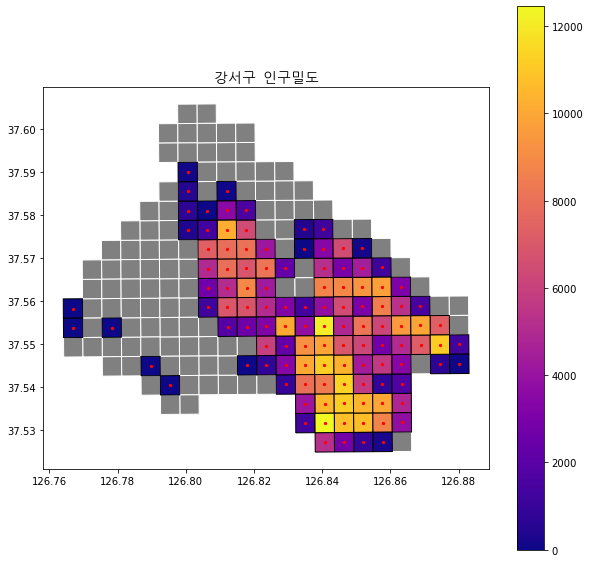

In [62]:
import matplotlib.font_manager as fm
from matplotlib.patches import Circle

# 한글 폰트 경로 설정
font_path = './data2/NanumGothic.ttf'  # 자신이 사용할 폰트 파일 경로로 수정해주세요.


# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14) 

fig, ax = plt.subplots(figsize=(10, 10))

seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
seoul2.centroid.plot(ax=ax, color='red', markersize=5)  # Plotting centroids as red points

plt.title('강서구 인구밀도', fontproperties=fontprop)
plt.show()


# 2. 모델링

## 2.1 k-means 클러스터링

In [78]:
from sklearn.cluster import KMeans
import seaborn as sns

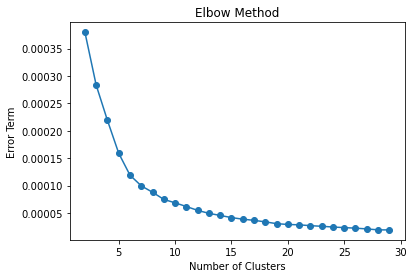

In [72]:
# Extract centroid coordinates as a DataFrame
centroid_df = pd.DataFrame({'위도': seoul2['centroid'].y, '경도': seoul2['centroid'].x})

# Specify the range of cluster numbers to try
num_of_clusters = range(2, 30)

# Initialize an empty list to store the error terms
error = []

# Perform K-means clustering with different cluster numbers
for num_clusters in num_of_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(centroid_df[['경도', '위도']].values)  # Convert coordinates to numeric values
    error.append(kmeans.inertia_/100)

# Create a DataFrame to store the results
table = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term": error})

table

# Plot the elbow curve
plt.plot(table['Cluster_Numbers'], table['Error_Term'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Error Term')
plt.title('Elbow Method')
plt.show()

- k가 7개 부터 에러 감소가 급격하게 줄어드는 것을 볼 수 있음

## 2.2 time series K-Means

In [76]:
# Perform K-means clustering with k=9
k = 9
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(centroid_df[['경도', '위도']].values)  # Convert coordinates to numeric values

# Add cluster labels to centroid DataFrame
centroid_df['Cluster'] = kmeans.labels_
centroid_df

,위도,경도,Cluster
0,37.554441,126.874479,6
1,37.558856,126.857458,2
2,37.558731,126.834815,5
3,37.549843,126.857536,2
4,37.563140,126.817792,8
...,...,...,...
108,37.567712,126.829074,8
109,37.572120,126.812048,1
110,37.576594,126.806344,1
111,37.581166,126.817627,1


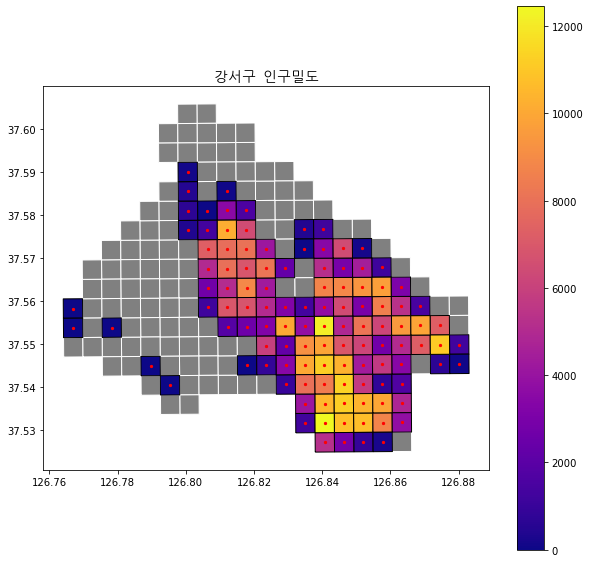

In [90]:
# Save the DataFrame with cluster information
centroid_df.to_excel('demand_points with_clusters.xlsx', index=False)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
for cluster_num in range(k):
    cluster_points = centroid_df[centroid_df['Cluster'] == cluster_num]
    ax.scatter(cluster_points['경도'], cluster_points['위도'], color='red', s=5)
plt.title('강서구 인구밀도', fontproperties=fontprop)
plt.show()

- 클러스터링 한 부분 엑셀로 저장

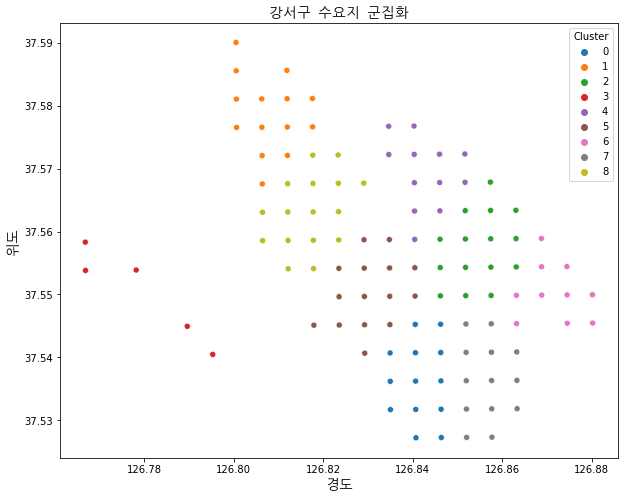

In [88]:
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=14) 

# Plot clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=centroid_df, x='경도', y='위도', hue='Cluster', palette='tab10')
plt.title('강서구 수요지 군집화', fontproperties=fontprop)
plt.xlabel('경도', fontproperties=fontprop)
plt.ylabel('위도', fontproperties=fontprop)
plt.legend(title='Cluster', loc='upper right')
plt.show()

## 2.1 기존 후보지

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

# 데이터로딩
D2 = pd.read_csv('C:/Users/User/Desktop/통계청 공모전/data2/이재민임시거주데이터.csv',encoding='utf-8', dtype=str)
D2.head()

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,상세주소,시설면적,주거능력,경도,위도,관리부서,지자체담당자연락처
0,2811000000,48,인천광역시,중구,004,관공서,율목동 행정복지센터,2811013100100270000066439,2811013100,2811057000,인천광역시 중구 개항로96번길 15(율목동),200,60,126.63356693,37.47142168,율목동장,NaN
1,4711000000,70,경상북도,포항시,004,관공서,송도동행정복지센터,4711110400104500005097839,4711110400,4711155000,경상북도 포항시 남구 송림로 25(송도동),132,40,129.37550616,36.03189326,이귀자,054-270-6450
2,4480000000,186,충청남도,홍성군,001,학교,홍북초등학교,4480031026100480003048148,4480025626,4480025600,충청남도 홍성군 홍북읍 매죽헌길 5,805,309,126.69509535,36.65106414,박영일,010-2925-2514
3,4711000000,146,경상북도,포항시,007,기타시설,제철동민 복지회관,4711111200103680045123576,4711111200,4711157000,경상북도 포항시 남구 냉천로 82(인덕동),330,126,129.40143309,35.98566144,전우필,054-282-0898
4,4711000000,237,경상북도,포항시,003,경로당,대잠3경로당,4711111600109420006120603,4711111600,4711159000,경상북도 포항시 남구 새천년대로422번길 7-7 (대잠동),159,61,129.3451497,36.01358879,김상용,NaN


In [39]:
df1 = D2[(D2['시군구명'] == '강서구') & (D2['시도명'] == '서울특별시')]

df1
df1.to_excel('강서구 이재민_data.xlsx', index=False)

In [28]:
# DataFrame의 결측치 확인
null_values = df1.isnull().sum()
print(null_values)


지역코드          0
시설일련번호        0
시도명           0
시군구명          0
시설구분코드        0
시설구분          0
시설명           0
도로명주소코드       0
법정동코드         0
행정동코드         0
상세주소          0
시설면적          0
주거능력          0
경도            0
위도            0
관리부서          0
지자체담당자연락처    87
dtype: int64


- nan 값인 데이터만 추출

In [30]:
nan_values = df1[df1.isnull().any(axis=1)]
nan_values

,지역코드,시설일련번호,시도명,시군구명,시설구분코드,시설구분,시설명,도로명주소코드,법정동코드,행정동코드,상세주소,시설면적,주거능력,경도,위도,관리부서,지자체담당자연락처
13873,1150000000,357,서울특별시,강서구,003,경로당,봉바위 경로당,1150010300110610036019166,1150010300,1150061500,서울특별시 강서구 강서로34길 34(화곡동),90,34,126.84157703,37.54313157,최송자,NaN
13881,1150000000,340,서울특별시,강서구,001,학교,염경초등학교,1150010100100790000028128,1150010100,1150051000,서울특별시 강서구 양천로69길 49(염창동),843,324,126.87123471,37.55477385,조유나,NaN
13882,1150000000,422,서울특별시,강서구,001,학교,염경중학교,1150010100100790000028255,1150010100,1150051000,서울특별시 강서구 양천로69길 35(염창동),690,265,126.870684,37.554496,송채정,NaN
13883,1150000000,341,서울특별시,강서구,003,경로당,염창강변 경로당,1150010100101140002028129,1150010100,1150051000,서울특별시 강서구 양천로77길 58-25 (염창동),116,44,126.87585879,37.55156368,최순홍,NaN
13884,1150000000,432,서울특별시,강서구,013,"연수,숙박",JK블라썸 호텔,1150010100100200085027473,1150010100,1150051000,서울특별시 강서구 양천로65길 41-22 (염창동),8284,672,126.86760914,37.55684224,이재관,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14000,1150000000,434,서울특별시,강서구,003,경로당,동부경로당(방화1동),1150010900101680087004753,1150010900,1150063000,서울특별시 강서구 양천로28길 12-9 (방화동),98,37,126.81984909,37.57253425,황영길,NaN
14001,1150000000,392,서울특별시,강서구,014,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화11종합사회복지관,1150010900108510000001415,1150010900,1150064000,"서울특별시 강서구 개화동로21길 4(방화동, 방화11단지아파트)",123,47,126.805531,37.5701452,신택원,NaN
14002,1150000000,393,서울특별시,강서구,014,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화6종합사회복지관,1150010900108160000000206,1150010900,1150064100,"서울특별시 강서구 금낭화로23길 25(방화동, 방화6단지아파트)",81,31,126.81083884,37.57840035,심혜수,NaN
14003,1150000000,394,서울특별시,강서구,014,"공공시설(국·공립도서관, 공립병원, 시·도민회관, 구민회관 주민체육시설, 노인병원,...",방화2종합사회복지관 (우정),1150010900108390000000213,1150010900,1150064100,"서울특별시 강서구 방화대로48길 40(방화동, 방화2단지아파트)",88,33,126.81873984,37.57477652,김민교,NaN


-> 모든 관리 부서의 담당자 연락처가 없었음 

## 2.2 기존 대피소 시각화

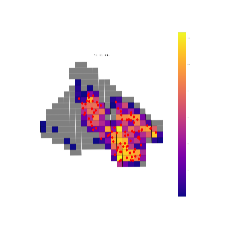

In [35]:
# 지도 그리기 코드
fig, ax = plt.subplots(figsize=(30, 30))
# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=20) 

x0 = df1['경도'].astype(float).tolist()  # 경도 값을 실수로 변환하여 할당
y0 = df1['위도'].astype(float).tolist()  # 위도 값을 실수로 변환하여 할당

ax2 = seoul.convex_hull.plot(ax=ax, color='gray', edgecolor='w')
ax2 =  seoul.plot(column='val', cmap='plasma', edgecolor='black', legend=True, ax=ax)
#ax2 = new_seoul.convex_hull.plot(color='#F8DFDF', edgecolor="w")

# 동그라미로 대피소 표시하는 코드
for x, y in zip(x0, y0):
    circle = Circle((x, y), radius=0.001, facecolor='red', edgecolor='red')
    ax2.add_patch(circle)
ax2.set_axis_off()

# 지도 이름과 범례 추가
plt.title("서울 기존 대피소", fontproperties=fontprop)  # 지도 이름

# 이미지 저장
plt.savefig('기존 대피소.png', dpi=300)
plt.close()

# 이미지 표시
image = plt.imread('기존 대피소.png')
plt.imshow(image)
plt.axis('off')
plt.show()